In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("../data/city_day.csv", encoding='latin1')

In [80]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [81]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [82]:
# null values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [83]:
df.shape

(29531, 16)

In [84]:
## no of null value based on the cities
df.groupby('City').apply(lambda x: x.isnull().sum())

C:\Users\Punith\AppData\Local\Temp\ipykernel_6828\3178840661.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('City').apply(lambda x: x.isnull().sum())


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,,
Ahmedabad,0,0,628,1602,609,608,594,2009,609,640,685,483,483,484,675,675
Aizawl,0,0,2,1,0,0,0,0,0,0,9,15,15,113,2,2
Amaravati,0,0,59,55,55,55,55,55,97,65,55,75,75,269,110,110
Amritsar,0,0,128,63,93,44,289,42,76,168,115,195,212,213,95,95
Bengaluru,0,0,146,360,6,6,4,203,11,6,144,266,93,2009,99,99
Bhopal,0,0,9,9,9,9,9,9,9,9,9,289,289,289,11,11
Brajrajnagar,0,0,185,173,243,234,175,226,150,193,203,173,938,938,225,225
Chandigarh,0,0,15,0,4,4,4,10,0,0,0,0,0,0,5,5
Chennai,0,0,117,1707,36,36,36,462,25,36,49,285,253,2009,125,125


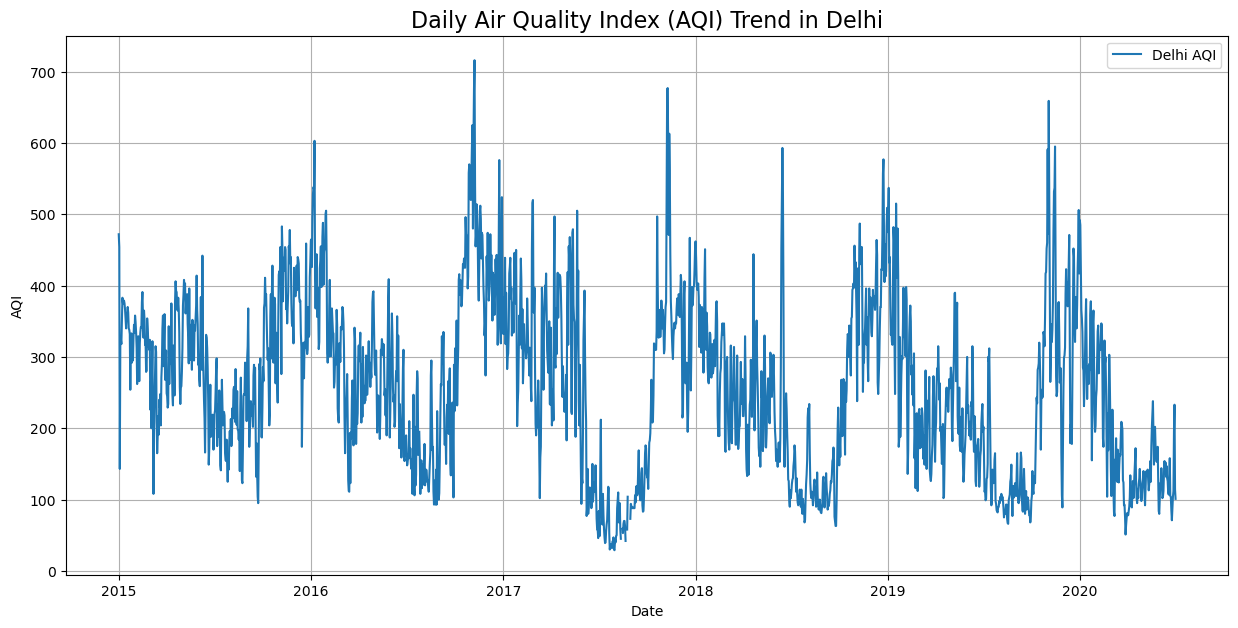

In [85]:
# I need to make sure the 'Date' column is in the correct datetime format first.
df['Date'] = pd.to_datetime(df['Date'])

# I'll filter the data to get only Delhi's records.
df_delhi = df[df['City'] == 'Delhi']

# Now, I'll create the plot.
plt.figure(figsize=(15, 7))
plt.plot(df_delhi['Date'], df_delhi['AQI'], label='Delhi AQI')
plt.title('Daily Air Quality Index (AQI) Trend in Delhi', fontsize=16)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.legend()
plt.show()

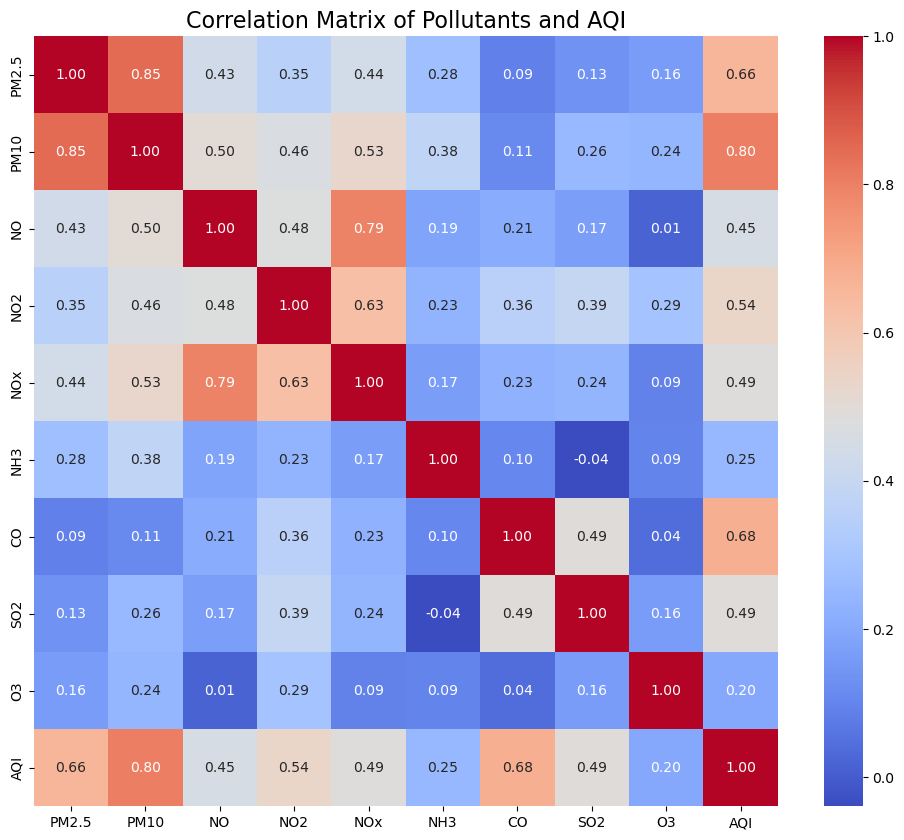

In [86]:
# I'll select only the numeric columns for the correlation calculation.
numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2',
                'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI']

# I'll calculate the correlation matrix.
correlation_matrix = df[numeric_cols].corr()

# Now, I'll create the heatmap.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pollutants and AQI', fontsize=16)
plt.show()

### Handling missing value
- I am not deleting the rows which are having the missing value because it will remove all the important data in it 
- I am also not filling mean value of the particular state  to its null value as it is a time series it will not give the better accracy of the model
- So I am using linear interpolation to fill the missing value by grouping the states as it is a time series data set it will give more accuract for it  

In [87]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [88]:
# I'll select the columns I want to interpolate.
interpolate_col = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
                   'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

In [89]:
# For each column, I'll group by 'City' and then apply the interpolation.
for col in interpolate_col:
    df[col] = df.groupby('City')[col].transform(
        lambda x: x.interpolate(method='linear'))

# Now, I'll check for nulls again. There might be a few left at the beginning of each city's data.
print(df.isnull().sum())

City              0
Date              0
PM2.5          2422
PM10           9481
NO             1179
NO2            1180
NOx            1563
NH3            8392
CO                6
SO2            1132
O3             1262
Benzene        3146
Toluene        4431
Xylene        15040
AQI            1841
AQI_Bucket     4681
dtype: int64


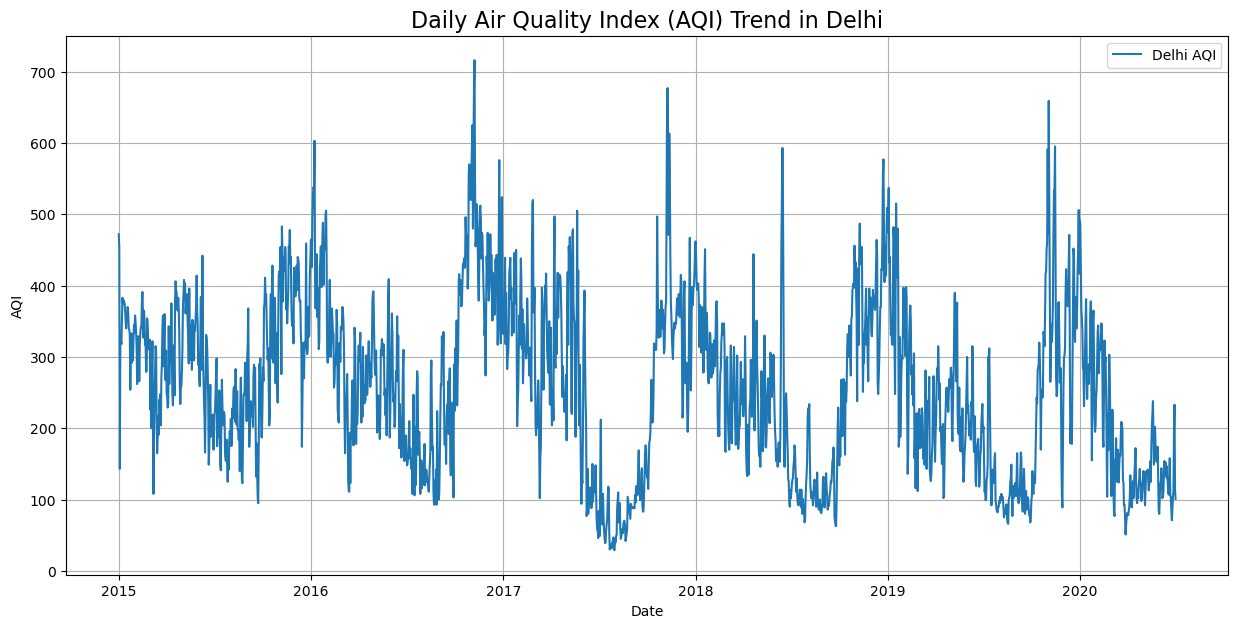

In [90]:
# I need to make sure the 'Date' column is in the correct datetime format first.
df['Date'] = pd.to_datetime(df['Date'])

# I'll filter the data to get only Delhi's records.
df_delhi = df[df['City'] == 'Delhi']

# Now, I'll create the plot.
plt.figure(figsize=(15, 7))
plt.plot(df_delhi['Date'], df_delhi['AQI'], label='Delhi AQI')
plt.title('Daily Air Quality Index (AQI) Trend in Delhi', fontsize=16)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.legend()
plt.show()

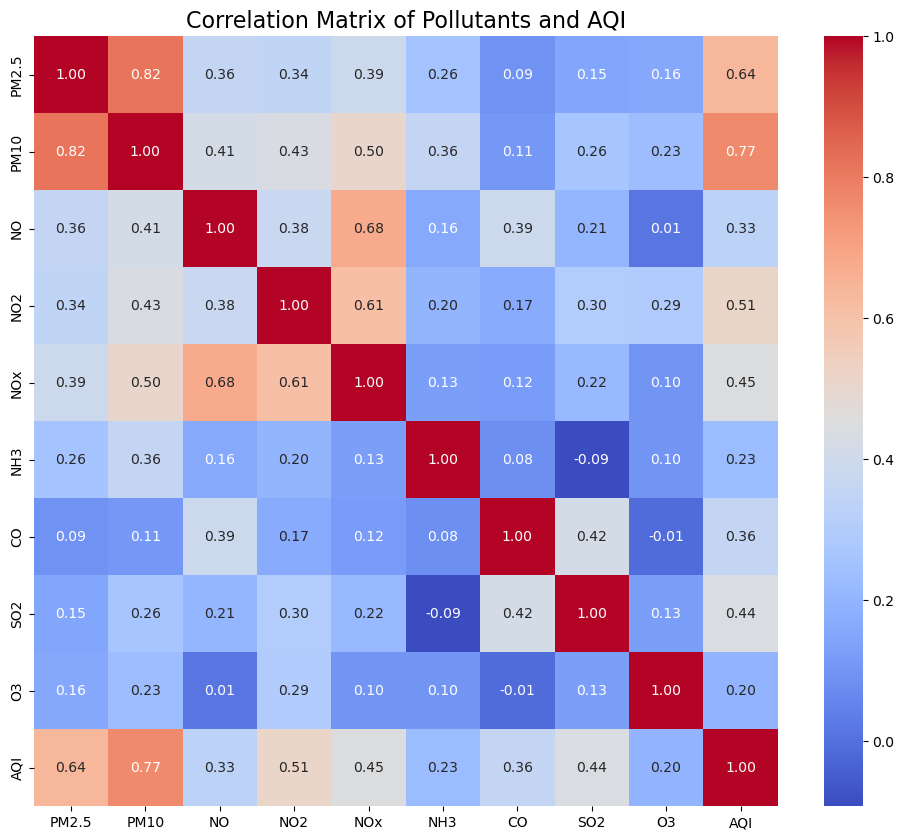

In [91]:
# I'll select only the numeric columns for the correlation calculation.
numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2',
                'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI']

# I'll calculate the correlation matrix.
correlation_matrix = df[numeric_cols].corr()

# Now, I'll create the heatmap.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pollutants and AQI', fontsize=16)
plt.show()

- From above you can see that after filling missing value through interpolation there are some null value beacuse from starting there was null value in each group of the state so there was null value 

- so i have filled this with mean valuse of the particualr state after this  also there may exist null values if all values are empty in a state group so for this i have taken whole mean of the data set

In [97]:
# I'll define the columns I need to clean.
cols_to_clean = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
                 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# For each column, I'll fill the missing values with the mean of that city.
# This approach is more robust and handles cities with no data for a pollutant.
for col in cols_to_clean:
    df[col] = df.groupby('City')[col].transform(lambda x: x.fillna(x.mean()))

# After the city-specific fill, a few NaNs might remain if a city had NO data at all.
# I'll fill these last few gaps with the overall mean of the entire column.
df.fillna(df.mean(numeric_only=True), inplace=True)

# Now, I'll do a final check. The output should be 0.
print("Total remaining null values:")
print(df.isnull().sum())

Total remaining null values:
City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64


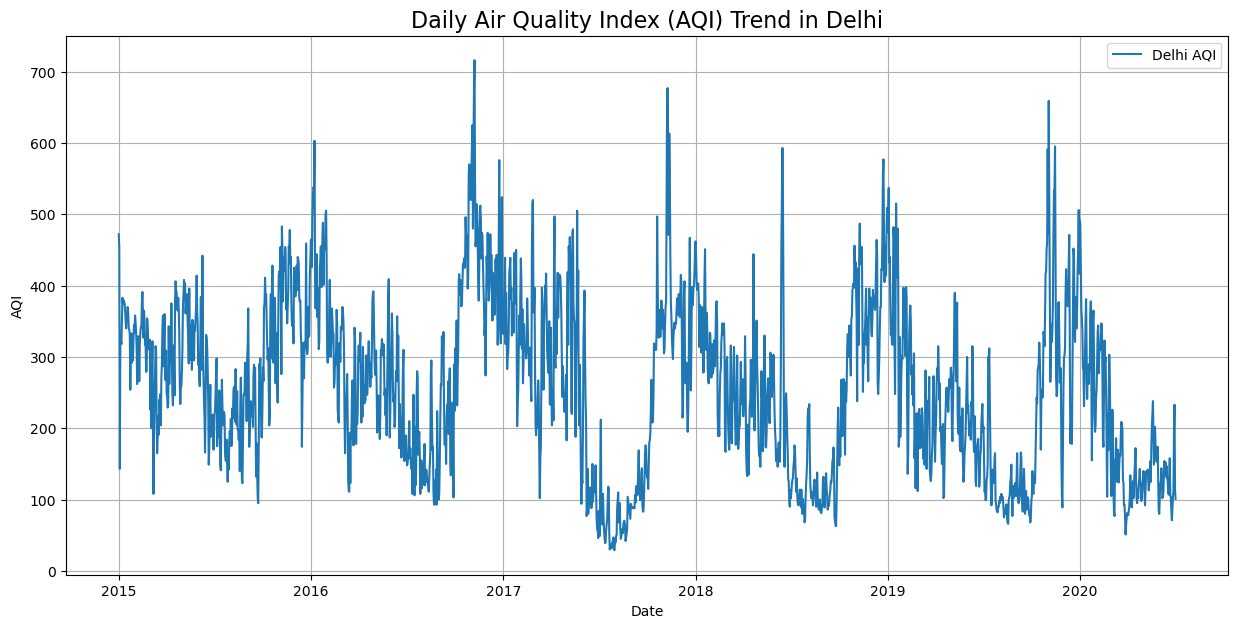

In [98]:
# I need to make sure the 'Date' column is in the correct datetime format first.
df['Date'] = pd.to_datetime(df['Date'])

# I'll filter the data to get only Delhi's records.
df_delhi = df[df['City'] == 'Delhi']

# Now, I'll create the plot.
plt.figure(figsize=(15, 7))
plt.plot(df_delhi['Date'], df_delhi['AQI'], label='Delhi AQI')
plt.title('Daily Air Quality Index (AQI) Trend in Delhi', fontsize=16)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.legend()
plt.show()

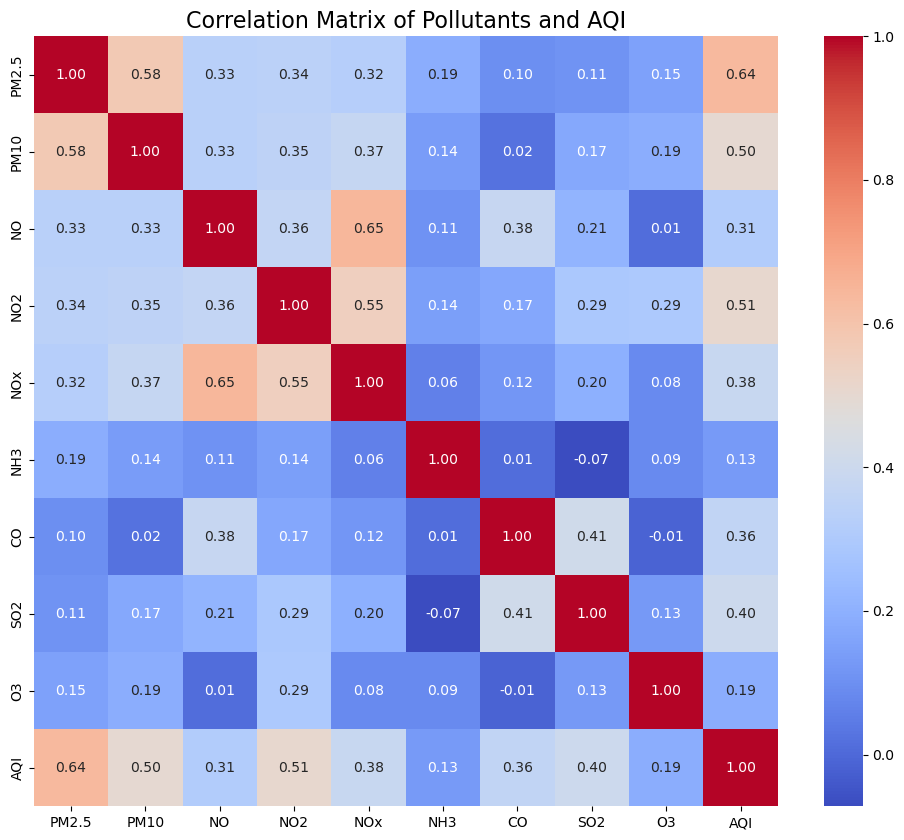

In [99]:
# I'll select only the numeric columns for the correlation calculation.
numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2',
                'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI']

# I'll calculate the correlation matrix.
correlation_matrix = df[numeric_cols].corr()

# Now, I'll create the heatmap.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pollutants and AQI', fontsize=16)
plt.show()

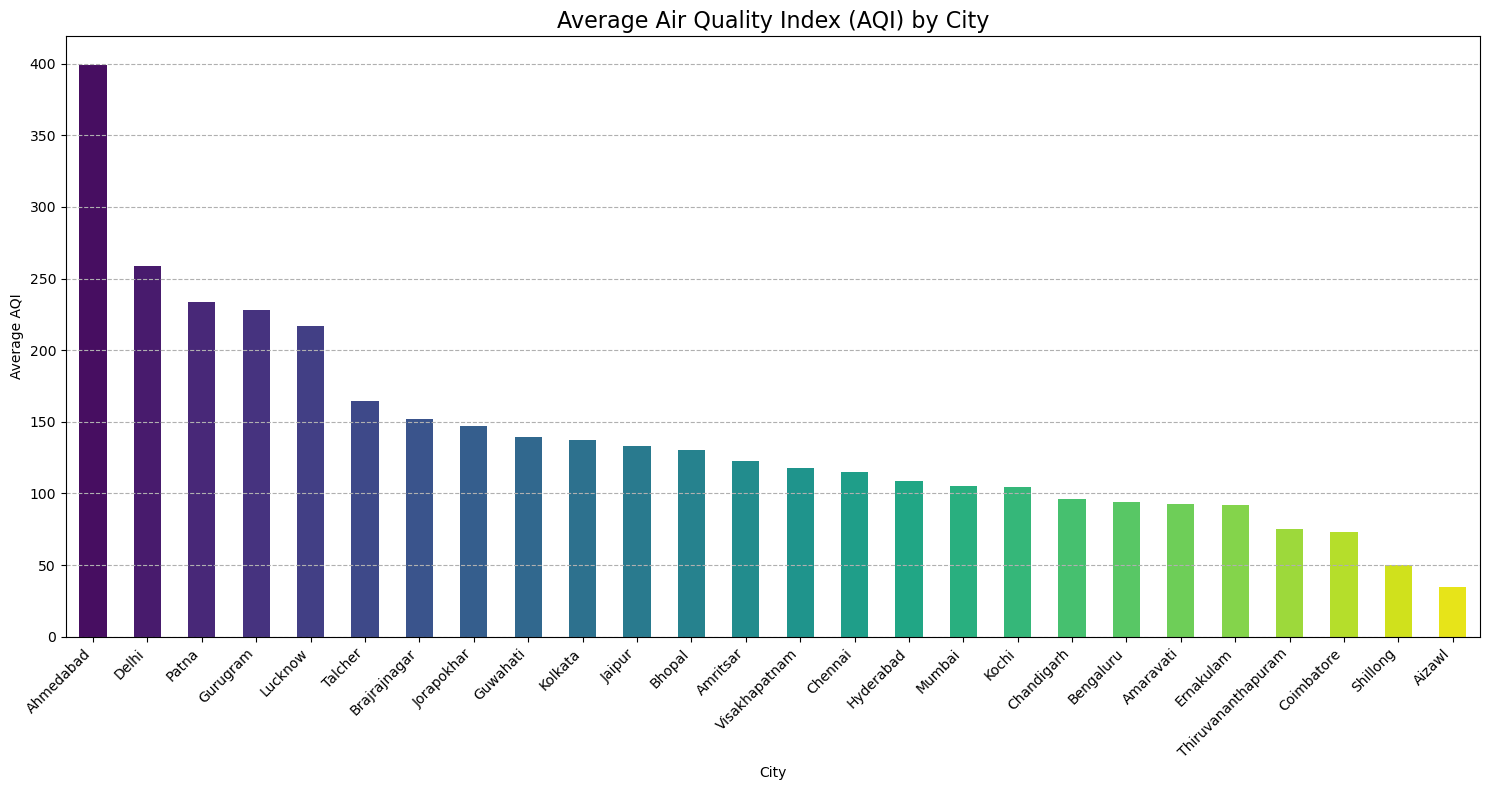

In [95]:
# I'll calculate the average AQI for each city.
avg_aqi_by_city = df.groupby('City')['AQI'].mean().sort_values(ascending=False)

# I'll create the bar plot.
plt.figure(figsize=(15, 8))
avg_aqi_by_city.plot(kind='bar', color=sns.color_palette(
    'viridis', len(avg_aqi_by_city)))
plt.title('Average Air Quality Index (AQI) by City', fontsize=16)
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=45, ha='right')  # Rotate city names for better readability
plt.grid(axis='y', linestyle='--')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [102]:
df.drop(columns=['AQI_Bucket'], inplace=True)

In [103]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,78.229314,115.195651,0.92,18.22,17.15,23.371912,0.92,27.64,133.36,0.00,0.02,0.00,399.051742
1,Ahmedabad,2015-01-02,78.229314,115.195651,0.97,15.69,16.46,23.371912,0.97,24.55,34.06,3.68,5.50,3.77,399.051742
2,Ahmedabad,2015-01-03,78.229314,115.195651,17.40,19.30,29.70,23.371912,17.40,29.07,30.70,6.80,16.40,2.25,399.051742
3,Ahmedabad,2015-01-04,78.229314,115.195651,1.70,18.48,17.97,23.371912,1.70,18.59,36.08,4.43,10.14,1.00,399.051742
4,Ahmedabad,2015-01-05,78.229314,115.195651,22.10,21.42,37.76,23.371912,22.10,39.33,39.31,7.01,18.89,2.78,399.051742


In [104]:
df.isnull().sum()

City       0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [105]:
df.shape

(29531, 15)

In [106]:
df.to_csv("../data/cleaned_city_day.csv", index=False)